In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

%matplotlib inline

In [3]:
data = pd.read_csv('epi_r.csv')

In [4]:
list(data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [5]:
data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

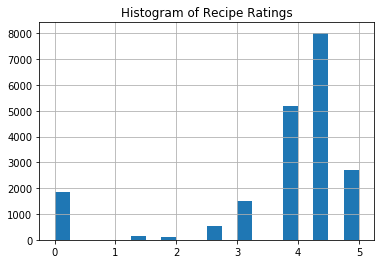

In [6]:
data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [7]:
from sklearn.svm import SVR
svr = SVR()

X = data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = data.rating

svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
svr.score(X, Y)

0.03856570651298896

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([0.01818511, 0.026411  , 0.03037705, 0.01957949, 0.02451197])

In [6]:
# Count nulls of features
null_count = data.isnull().sum()
null_count[null_count > 0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
# adding indices of missing feature data into a Set to asses the dispersion of of missing data across 
# the entire data set
big_mask = data.isnull()
unique_rows = set(list(big_mask[big_mask.calories == True].index.values))
unique_rows.update(list(big_mask[big_mask.protein == True].index.values))
unique_rows.update(list(big_mask[big_mask.fat == True].index.values))
unique_rows.update(list(big_mask[big_mask.sodium == True].index.values))
print('\nThe missing data for the 4 features are roughly confined to the same %d indices' % (len(unique_rows)))



The missing data for the 4 features are roughly confined to the same 4188 indices


In [11]:
# Remove title feature and drop all NaN

data = data.dropna()

# We have 680 features at this point
# Now we will perform a rigorous approach of removing those features with zero variance.
selector = VarianceThreshold(threshold=(.90 * (1 - .90)))
selector.fit(data, data.rating)
data = data.loc[:, selector.get_support()]


print("Number of features after pruning and removing those features with zero variance: %d" % (len(data.columns)))
data.head()

Number of features after pruning and removing those features with zero variance: 32


,rating,calories,protein,fat,sodium,bake,bon appétit,dairy free,dessert,dinner,...,side,soy free,sugar conscious,summer,tomato,tree nut free,vegetable,vegetarian,wheat/gluten-free,winter
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,4.375,403.0,18.0,23.0,1439.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,4.375,948.0,19.0,79.0,1042.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


count    15864.000000
mean         3.760952
std          1.285518
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64


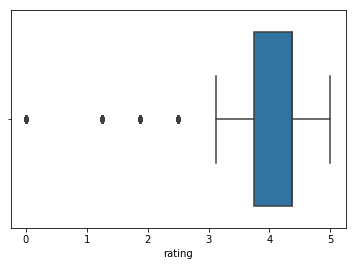

In [13]:
print(data.rating.describe())
__ = sns.boxplot(data.rating)

In [15]:


data['collapsedrating'] = np.where(data.rating < 4.0, 0, 1)
print('The amount of observations that are delicious: %d' % ((data.collapsedrating == 1).sum()))

# Lets remove the rating feature before we build the classifier
del data['rating']

The amount of observations that are delicious: 8658


In [23]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Function creates decision boundary plot and draws test samples if present 
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]                               
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]   
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', 
                alpha=1.0, linewidth=1, marker='o', 
                s=55, label='test set')

In [26]:
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC

X = data.drop(['collapsedrating'], 1)
print('The number of observations is : %d and the number of features are: %d' % (X.shape[0], len(X.columns)))
y = data['collapsedrating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svm = SVC(C=1.0, random_state=0)
svm.fit(X_train, y_train)
y_ = svm.predict(X_test)


print("\nAccuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("\nAccuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=svm)

#plt.xlabel('Delicious')
#plt.ylabel('Not Delicious')
#plt.legend(loc='upper left')
#plt.show()

The number of observations is : 15864 and the number of features are: 31

Accuracy on training set: 0.974

Accuracy on test set: 0.619


MemoryError: 